# PDX Tumor Velocity

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

# RNA Velocity on all tumors

In [2]:
adata = cr.read('../../out/PDX-tumors/adata_03.h5ad')

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


In [3]:
adata

AnnData object with n_obs × n_vars = 928 × 10885
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff', 'specialists_pca_diffdist', 'SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score', 'SCLC-A2_Score', 'SCLC-A_Score', 'Phenotype', 'SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos', 'arc_pheno', 'arc_aa_type'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mito', 'pct_dropout_by_counts-Tumor 1', 'ambient-Tumor 1', 'dropkick_coef-Tumor 1', 'pct_dropout_by_counts-Tumor 2', 'ambient-Tu

## Calculating Velocity

In [4]:
scv.pp.neighbors(adata) # subsetting corrupted neighborhood graph-- redo here
scv.pp.moments(adata)
# scv.tl.velocity(adata, mode = 'deterministic', groupby='cline')
# scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata, n_jobs=8) #uses velocity genes from deterministic model as default
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 8/16 cores)


  0%|          | 0/597 [00:00<?, ?gene/s]

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/928 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca_imputed', embedded velocity vectors (adata.obsm)


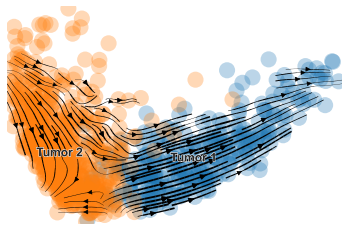

In [5]:
scv.pl.velocity_embedding_stream(
    adata, basis="pca_imputed", legend_fontsize=12, title="", smooth=0.8, min_mass=4, color = 'tumor'
)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


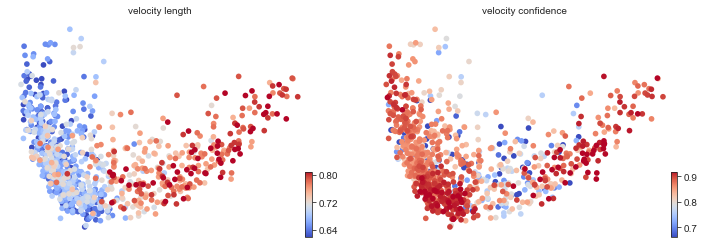

In [6]:
scv.tl.velocity_confidence(adata)

keys = 'velocity_length', 'velocity_confidence'  
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], basis = 'pca_imputed')



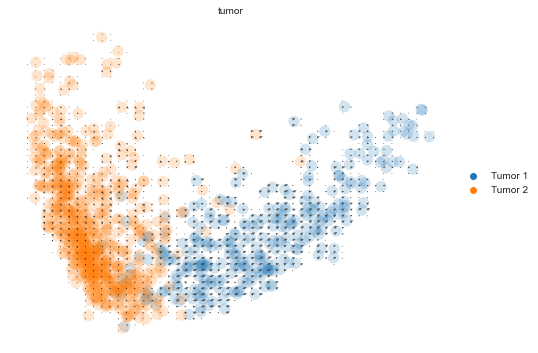

In [7]:
scv.pl.velocity_embedding_grid(adata, vkey='velocity',basis = 'pca_imputed', figsize = (8,6), legend_loc = 'on right',color = 'tumor')


Let's save the data at this point.

In [8]:
adata.write_h5ad('../../out/PDX-tumors/adata_03.h5ad')



In [9]:
adata = sc.read_h5ad('../../out/PDX-tumors/adata_03.h5ad')



## Kinetic Rate Parameters

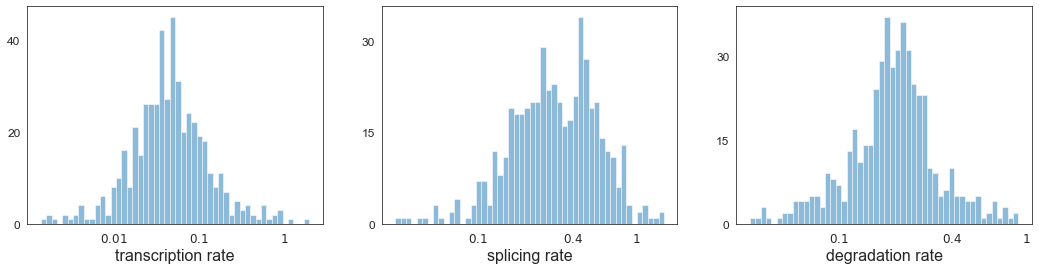

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/core/_anndata.py:311: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.var_names = df.index


,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
Gene,,,,,,,,,,,,,,,,
AL138963.4,0.709009,1.994020,0.119843,0.077390,55.902758,0.309008,2.721633,4.161619,0.292551,0.0,0.0,0.491798,14.422924,21.770506,0.615365,12.151524
ABCB9,0.080843,0.375559,2.585647,0.062674,34.838316,0.028897,0.043004,0.703166,0.229863,0.0,0.0,0.437165,0.133870,4.154492,1.056408,6.022696
NOP16,0.015374,0.475855,10.546861,0.052884,12.311951,0.016566,0.014494,0.413403,0.166075,0.0,0.0,0.426986,0.045432,3.164141,1.769268,2.318023
ENO3,0.658072,0.498128,0.041886,0.074947,37.826882,1.031578,2.100048,1.068776,0.235426,0.0,0.0,0.464614,10.447310,4.079939,0.906603,11.571892
AC005329.3,0.086442,0.552843,2.131485,0.160855,14.206785,0.061226,0.063841,0.492684,0.235468,0.0,0.0,0.385021,0.192114,2.111688,1.141764,3.448235


In [10]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

# RNA Velocity By Tumor

I think our best bet is to just split up the adata object by cell line and run each individually. It would be nice to visualize all together, but some of the functions do not have a `groupby` parameter, and I'm worried calculating something like latent time across samples would infer latent time incorrectly.

In [11]:
import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)

def rna_velocity_recipe(adata, copy = False, basis = 'pca_imputed', resolution = .5, save = False):
    a = adata.copy() if copy else adata

    scv.pp.neighbors(a) # subsetting results in corrupted neighborhood graph-- redo here
    sc.tl.leiden(a, random_state = 0, resolution = resolution)         
            
    scv.pp.moments(a)
    # scv.tl.velocity(adata, mode = 'deterministic', groupby='cline')
    # scv.tl.velocity_graph(adata)
    
    ## Recover dynamics
    #see case 2 in https://github.com/theislab/scvelo/issues/497
    if 'velocity_genes' in a.var.columns:
        a.var.drop('velocity_genes',axis=1,inplace=True)

    scv.tl.recover_dynamics(a, n_jobs=8) #uses velocity genes from steady state model as default, but does not add them as attribute!
    scv.tl.velocity(a, mode="dynamical") #now this adds velocity_genes attribute to a
    scv.tl.velocity_graph(a)
    
    ## Plot embedding stream
    scv.pl.velocity_embedding_stream(a, basis=basis, legend_fontsize=12, title="", smooth=0.8, min_mass=4, color = 'leiden', save="velocity_embedding_stream_"+save)
    
    ## Velocity confidence
    scv.tl.velocity_confidence(a)
    keys = 'velocity_length', 'velocity_confidence'  
    scv.pl.scatter(a, c=keys, cmap='coolwarm', perc=[5, 95], basis = basis, save="velocity_confidence_"+save)
    scv.pl.velocity_embedding_grid(a, vkey='velocity',basis = basis, figsize = (8,6), legend_loc = 'on right',color = 'leiden', save="velocity_embedding_grid_"+save)
    
    ## Kinetic rate parameters
    df = a.var
    df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

    kwargs = dict(xscale='log', fontsize=16)
    with scv.GridSpec(ncols=3) as pl:
        pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
        pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
        pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)
    
    #Latent time
    scv.tl.latent_time(a)
    scv.pl.scatter(a, color='latent_time', color_map='gnuplot', size=80, basis = basis, save= "latent_time"+save)
    
    #Fit Genes
    top_genes = a.var['fit_likelihood'].sort_values(ascending=False).index
    scv.pl.scatter(a, basis=top_genes[:15], ncols=5, frameon=False, color = 'leiden', save = "top_gene_fits_leiden_"+save)
    scv.pl.scatter(a, basis=top_genes[:15], ncols=5, frameon=False, color = 'latent_time', save = "top_gene_fits_LT"+save)

    return a if copy else None


  0%|          | 0/382 [00:00<?, ?gene/s]

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


  0%|          | 0/293 [00:00<?, ?cells/s]

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


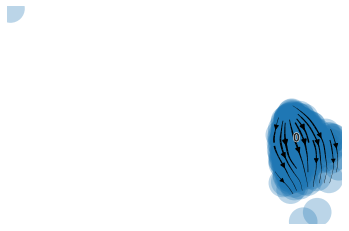

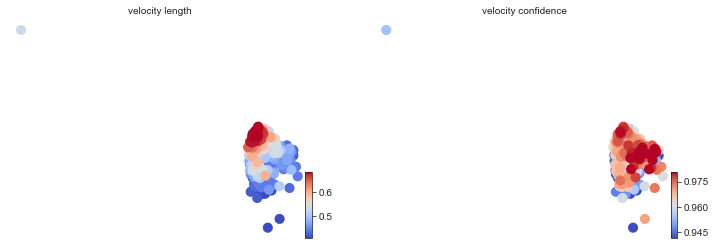

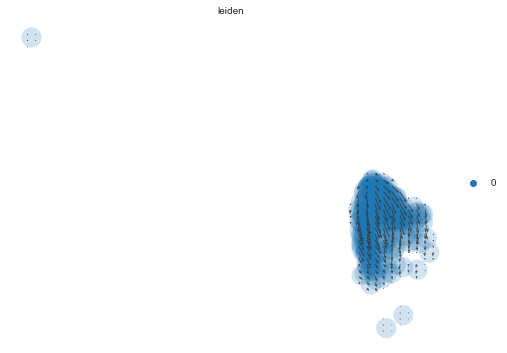

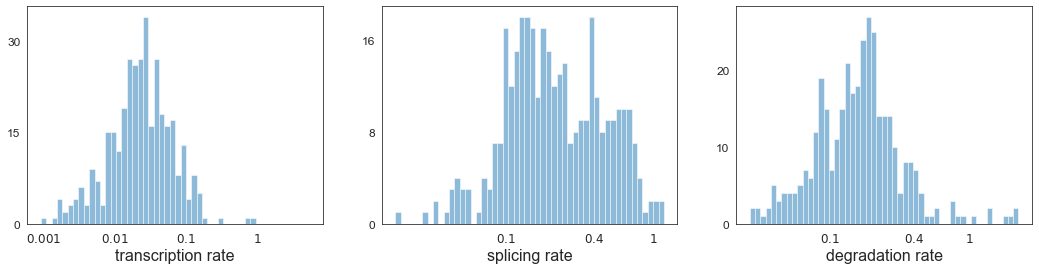

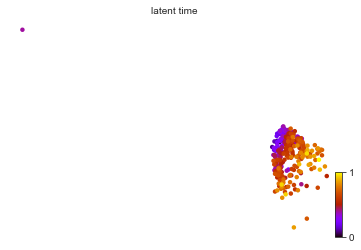

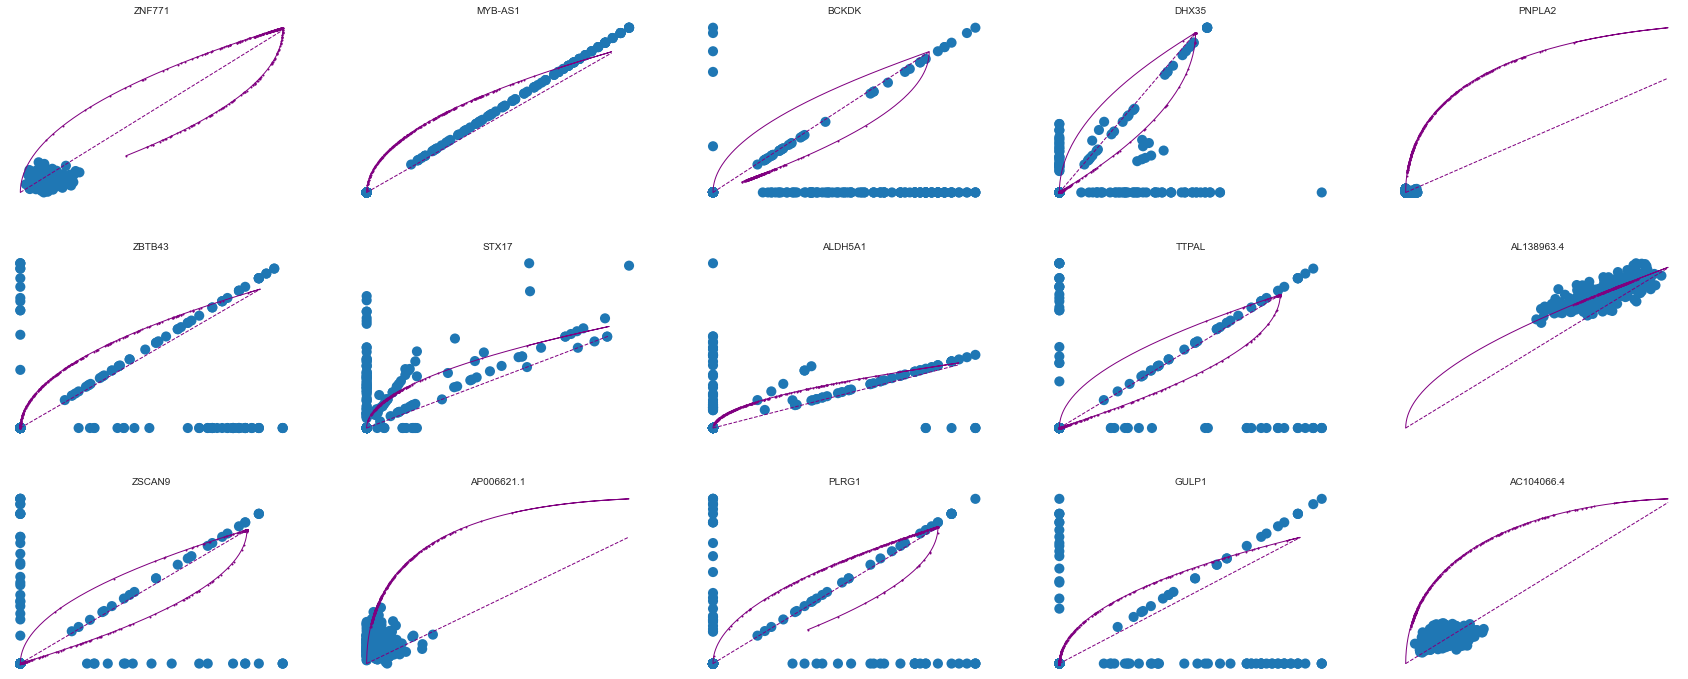

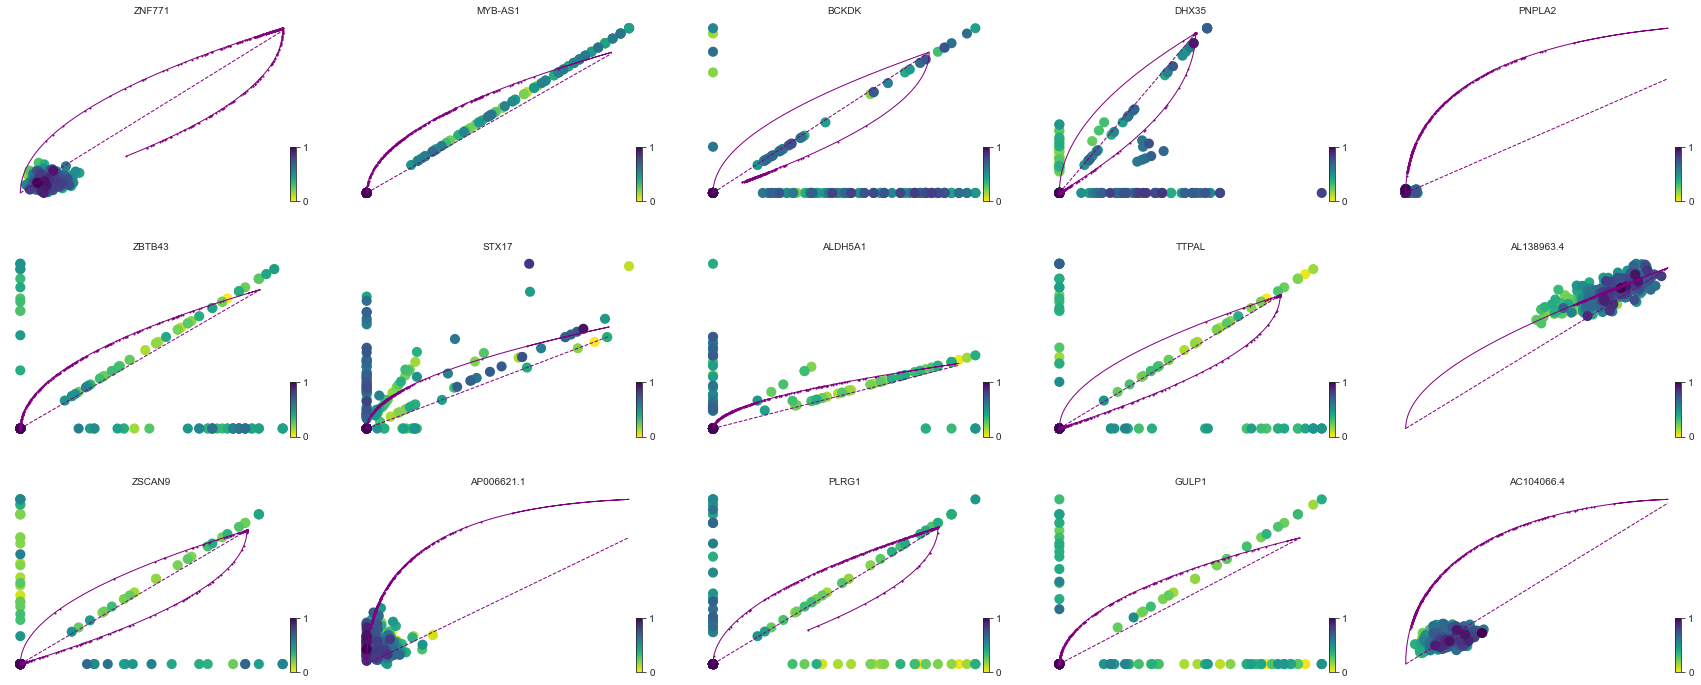

  0%|          | 0/391 [00:00<?, ?gene/s]

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


  0%|          | 0/635 [00:00<?, ?cells/s]

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


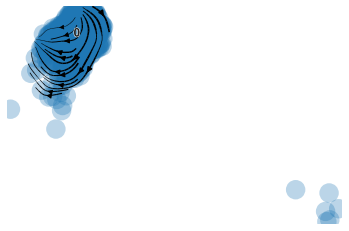

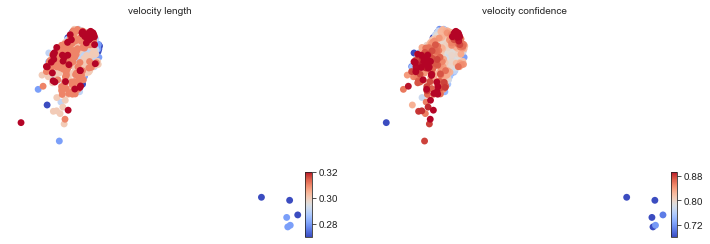

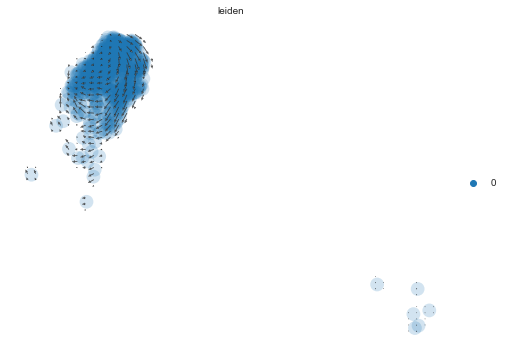

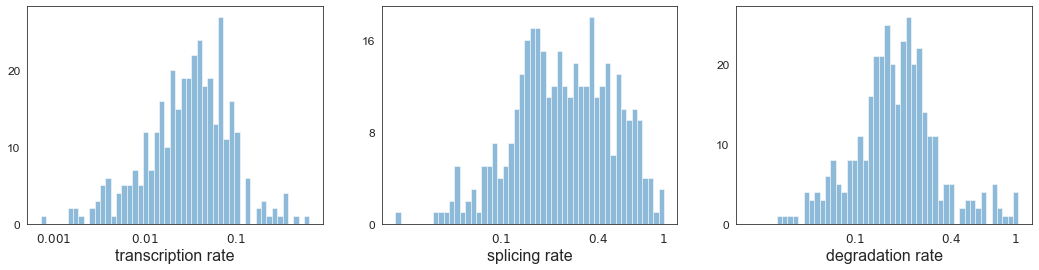

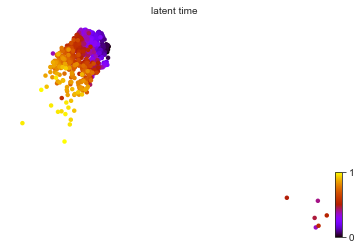

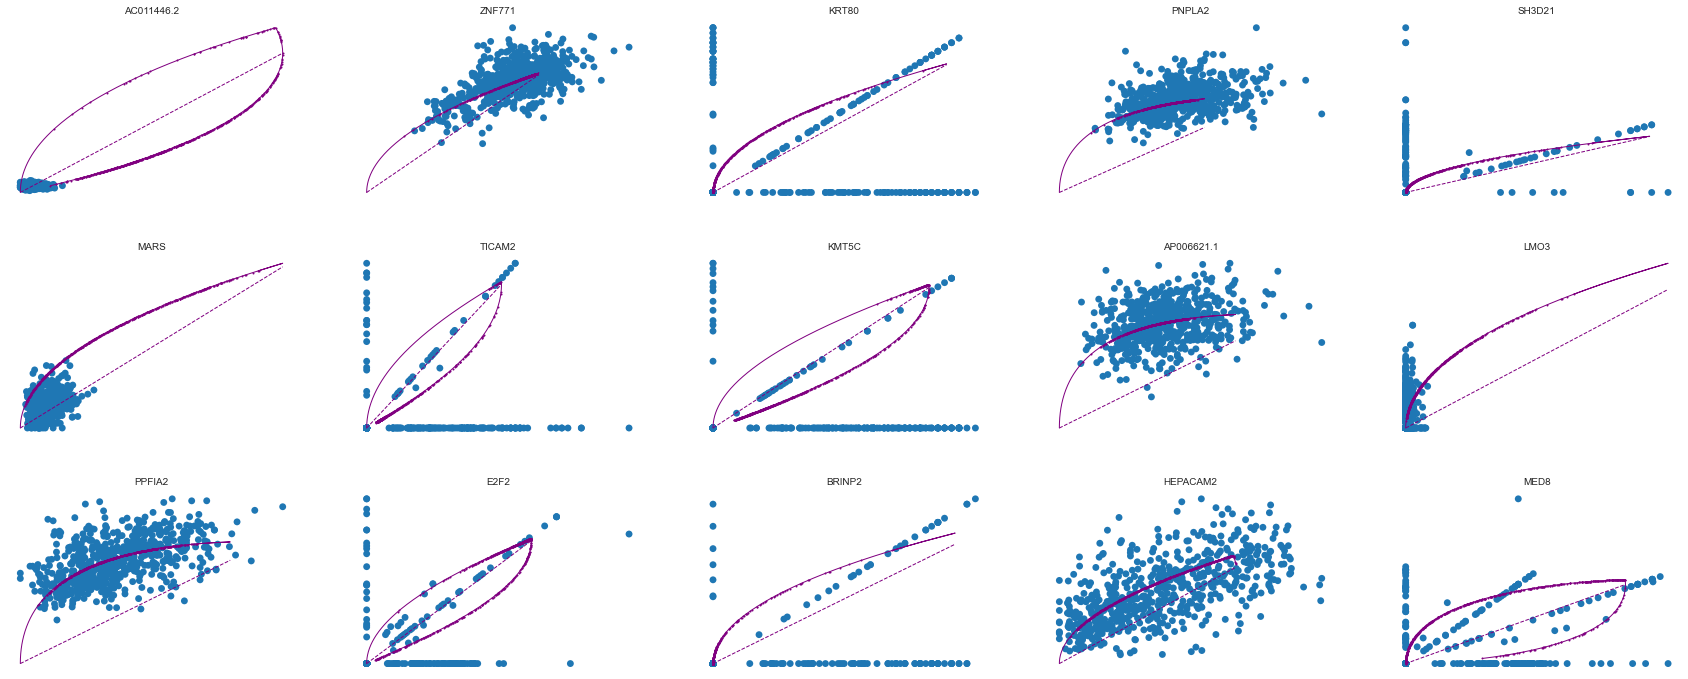

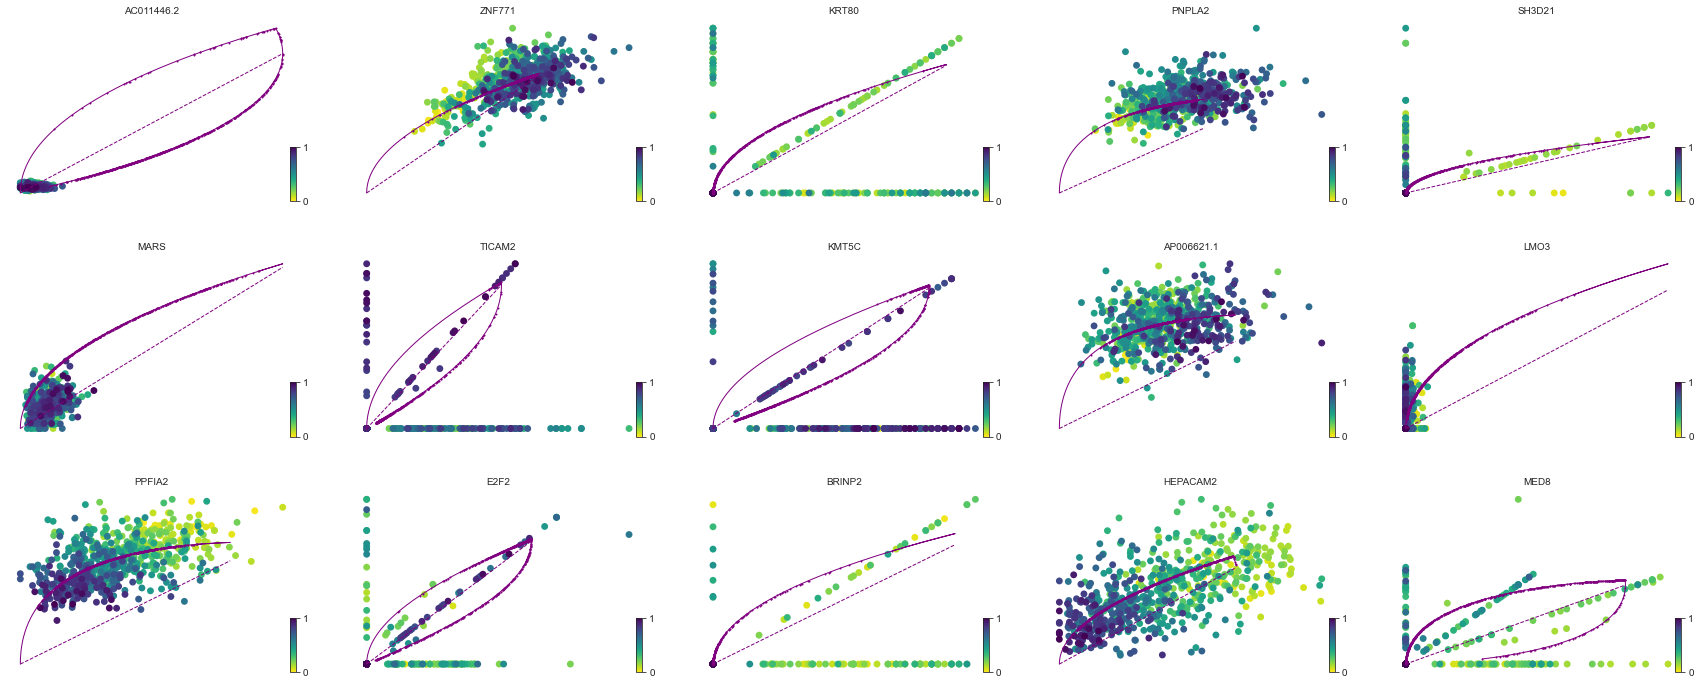

In [12]:
from scvelo import settings
settings.verbosity = 0
for i in list(adata.obs.tumor.unique()):
    tmp = adata[adata.obs.tumor == i].copy()
    rna_velocity_recipe(tmp, copy = False, basis = 'umap', resolution=.2, save=i)

# Circular projections

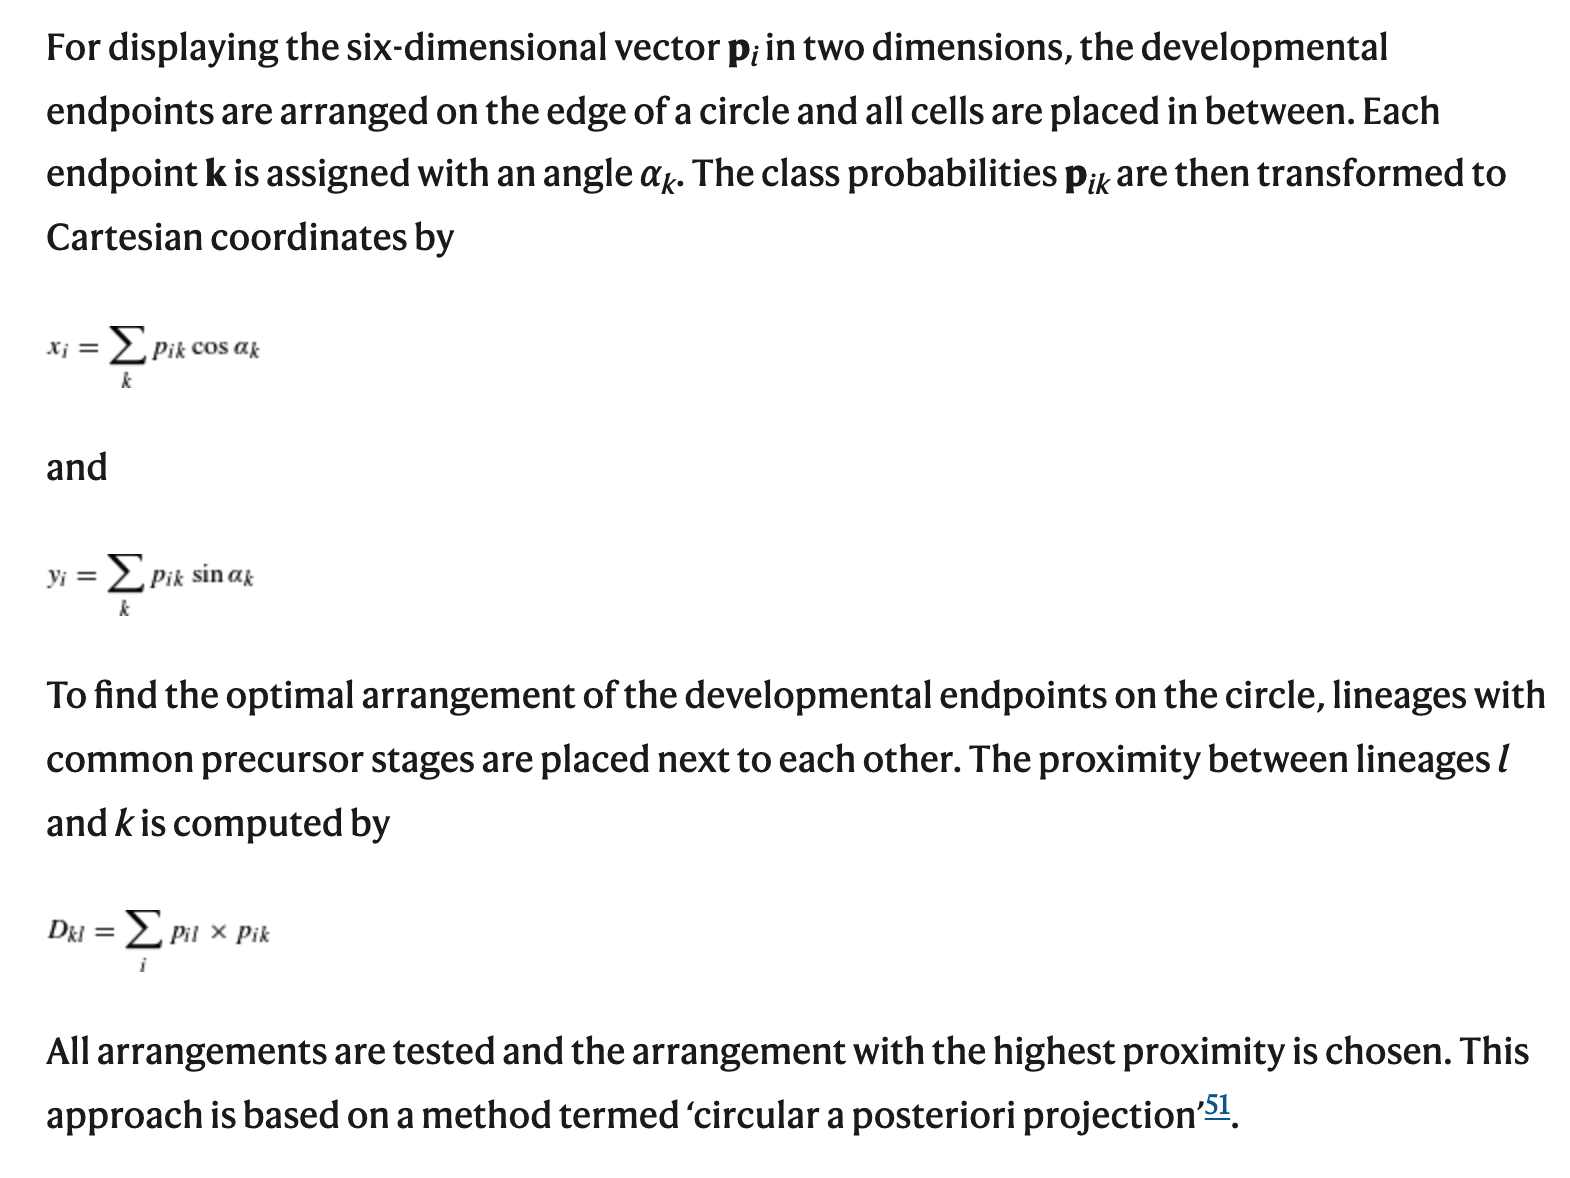

In [13]:
scores = adata.obs[[i for i in adata.obs.columns if '_Score_pos' in i]]


In [14]:
from itertools import permutations

# for a specific set of endpoints:
# arrange endpoints evenly around a circle (i.e. with angles a_k) for each k
# calculare x_i and y_i for each datapoint
# plot in cartesian coordinates
def proximity(probabilities):
    #for each pair of arcs, calculate proximity as sum of cross product 
    proximity = 0
    #list of pairs in order
    l = [[i,i+1] for i in range(len(probabilities.columns)-1)]
    l.append([len(probabilities.columns)-1, 0])
    best_dlk = 0
    best_perm = None
    for perm in list(permutations(probabilities.columns,5)):
        d_lk = 0
        for pair in l:
            # print(np.dot(probabilities[perm[pair[0]]], probabilities[perm[pair[1]]]))
            d_lk += np.dot(probabilities[perm[pair[0]]], probabilities[perm[pair[1]]])
        if d_lk > best_dlk:
            best_dlk = d_lk
            best_perm = perm
    return best_dlk, best_perm
        
def cap_plot(probabilities, hue = None, arc_hue_dict = None, plot_type = 'scatterplot', fill = False, levels = 10):
    probabilities = probabilities.dropna()

    n_arcs = len(probabilities.columns)

    best_dlk, best_perm = proximity(probabilities)
    # single assignment
    
    angles = np.linspace(0,360, n_arcs, endpoint=False)
    # assign arcs to angles
    print(best_perm)
    ang_dict = {i:k for i,k in zip(best_perm, angles)}
    # given assignment, project probabilities to cartesian coordinates
    # each data point
    # x_i
    x = [probabilities[list(best_perm)].loc[i].dot(np.cos(np.radians([ang_dict[o] for o in best_perm]))) for i,r in probabilities.iterrows()]
    #y_i
    y = [probabilities[list(best_perm)].loc[i].dot(np.sin(np.radians([ang_dict[o] for o in best_perm]))) for i,r in probabilities.iterrows()]
    
    
    #archetype locations
    x_arc = np.cos(np.radians([ang_dict[o] for o in best_perm]))
    y_arc = np.sin(np.radians([ang_dict[o] for o in best_perm]))
    
    plt.figure(figsize = (10,10))
    if plot_type == 'scatterplot':
        sns.scatterplot(x,y, s =60, alpha = .5, hue = hue.loc[probabilities.index])
        sns.scatterplot(x_arc,y_arc, s = 100, c = [arc_hue_dict[i] for i in best_perm])
    elif plot_type == 'kde':
        sns.scatterplot(x_arc,y_arc, s = 100, c = [arc_hue_dict[i] for i in best_perm])
        sns.kdeplot(x,y, hue = hue.loc[probabilities.index], alpha = 0.5, fill = fill, levels = levels)

    plt.show()
    return best_perm

In [15]:
arc_hue_dict = {'SCLC-A_Score_pos':'r', 'SCLC-P_Score_pos':'blue', 'SCLC-A2_Score_pos':'orange', 'SCLC-N_Score_pos':'green', 'SCLC-Y_Score_pos':'purple'}

## Unnormalized

('SCLC-A_Score_pos', 'SCLC-Y_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos')


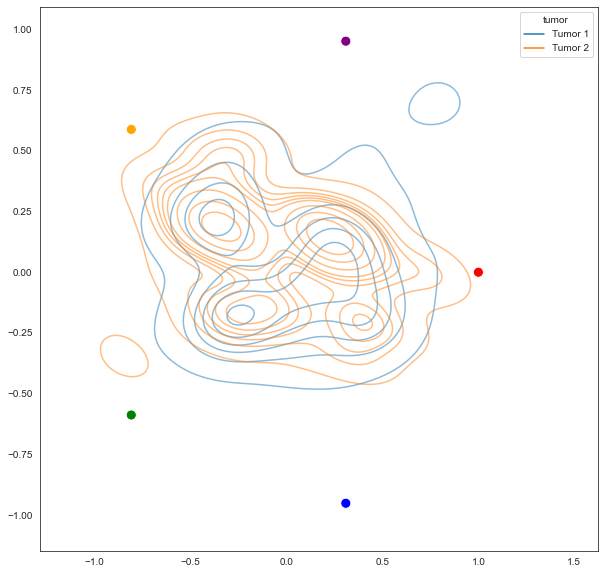

('SCLC-A_Score_pos',
 'SCLC-Y_Score_pos',
 'SCLC-A2_Score_pos',
 'SCLC-N_Score_pos',
 'SCLC-P_Score_pos')

In [16]:
cap_plot(scores, adata.obs.tumor, arc_hue_dict, plot_type='kde')

('SCLC-A_Score_pos', 'SCLC-P_Score_pos', 'SCLC-N_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-Y_Score_pos')


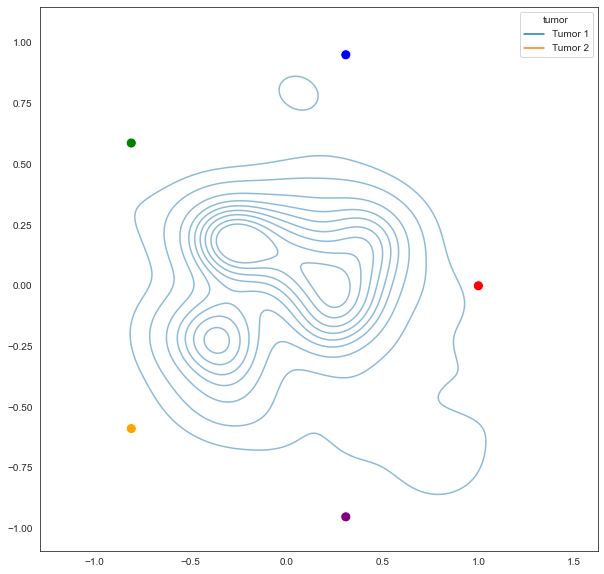

('SCLC-A_Score_pos', 'SCLC-P_Score_pos', 'SCLC-N_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-Y_Score_pos')


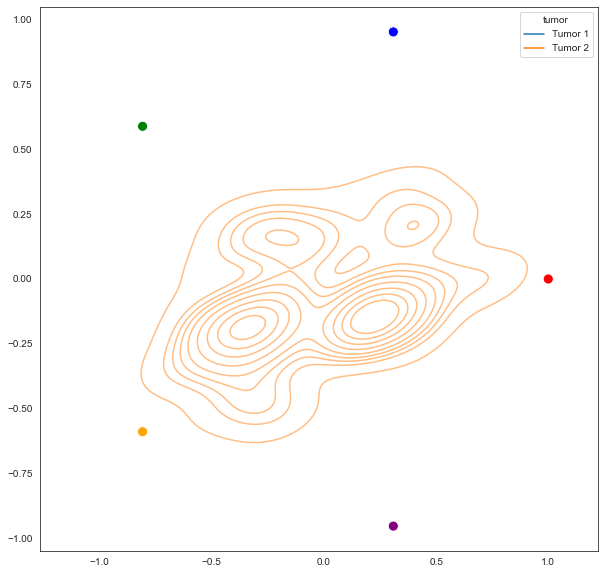

In [17]:
for i in adata.obs.tumor.unique():
    cap_plot(scores.loc[scores[adata.obs.tumor == i].index], adata.obs[adata.obs.tumor == i].tumor, arc_hue_dict, plot_type='kde', fill = False)

## Normalized

In [18]:
scores_norm = (scores.T/scores.sum(axis = 1)).T

('SCLC-A2_Score_pos', 'SCLC-Y_Score_pos', 'SCLC-A_Score_pos', 'SCLC-P_Score_pos', 'SCLC-N_Score_pos')


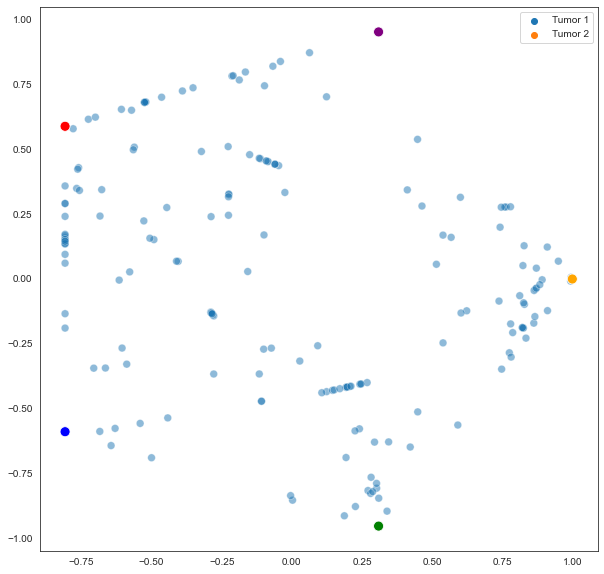

('SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos')


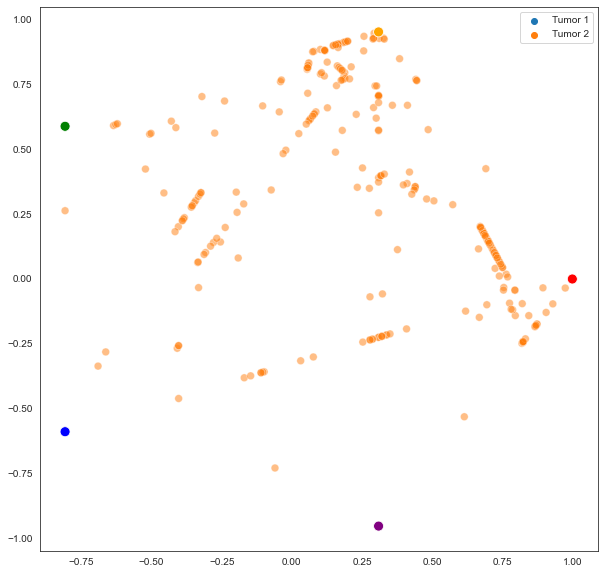

In [19]:
for i in adata.obs.tumor.unique():
    cap_plot(scores_norm.loc[scores[adata.obs.tumor == i].index], adata.obs[adata.obs.tumor == i].tumor, arc_hue_dict)

('SCLC-A_Score_pos', 'SCLC-P_Score_pos', 'SCLC-N_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-Y_Score_pos')


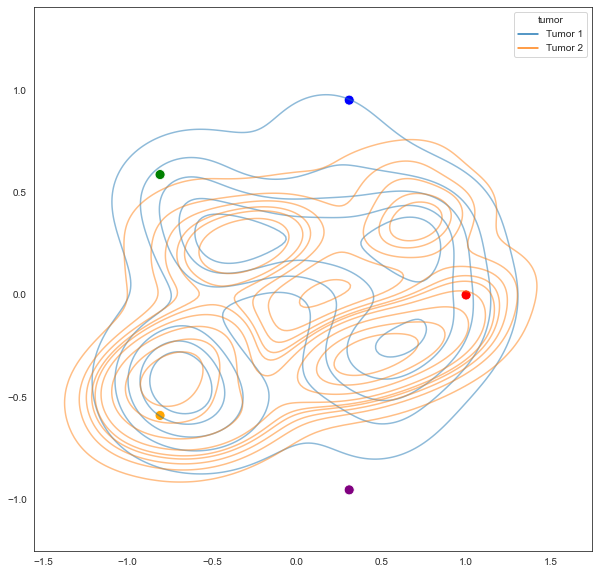

('SCLC-A_Score_pos',
 'SCLC-P_Score_pos',
 'SCLC-N_Score_pos',
 'SCLC-A2_Score_pos',
 'SCLC-Y_Score_pos')

In [20]:
cap_plot(scores_norm, adata.obs.tumor, arc_hue_dict, plot_type='kde')

('SCLC-A2_Score_pos', 'SCLC-Y_Score_pos', 'SCLC-A_Score_pos', 'SCLC-P_Score_pos', 'SCLC-N_Score_pos')


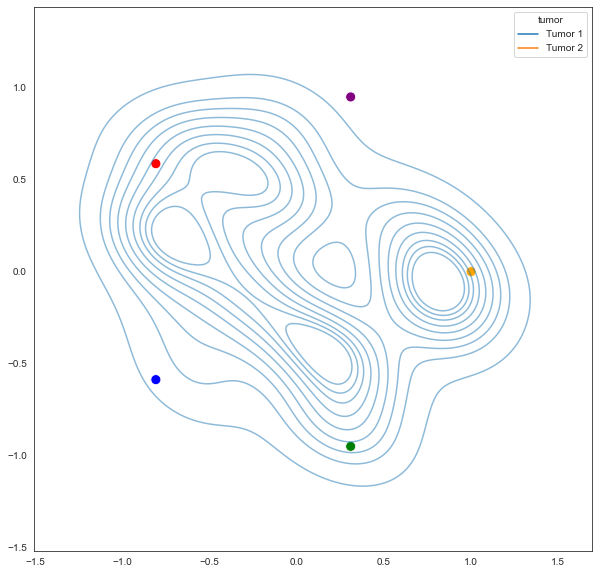

('SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos')


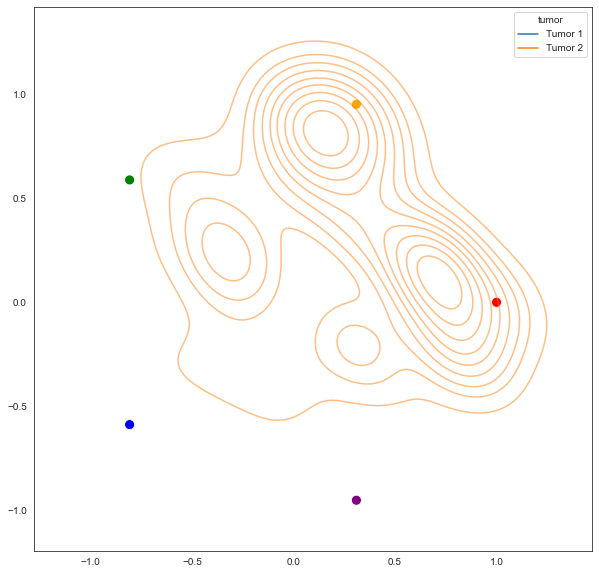

In [21]:
for i in adata.obs.tumor.unique():
    cap_plot(scores_norm.loc[scores[adata.obs.tumor == i].index], adata.obs[adata.obs.tumor == i].tumor, arc_hue_dict, plot_type='kde', fill = False)

In [22]:
adata.write_h5ad('../../out/PDX-tumors/adata_04.h5ad')
